In [32]:
pip install pandas 

Note: you may need to restart the kernel to use updated packages.


In [33]:
pip install seaborn # type: ignore 

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


In [31]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd

# Загрузка CSV-файла в DataFrame
df = pd.read_csv('transaction.csv')

# Переименование колонки 'trDte' в 'Date'
df.rename(columns={'trDte': 'Date'}, inplace=True)

# Преобразование колонки 'Date' в тип datetime с учетом формата день.месяц.год
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Вывод первых 5 строк
print("Первые 5 строк:")
print(df.head())

# Вывод основной информации о датасете
print("\nИнформация о датасете:")
print(df.info())

Первые 5 строк:
        Date          bcode     clientID      item  \
0 2017-09-01  code000000001  client13166   sku8444   
1 2017-09-01  code000000001  client13166  sku12545   
2 2017-09-01  code000000001  client13166   sku3391   
3 2017-09-01  code000000001  client13166  sku20444   
4 2017-09-01  code000000002   client1239  sku29959   

                      itemGroup  quantity  amount  
0              Скобяные изделия         1      29  
1  Оборудование для сада и дачи         1     329  
2                   Инструменты         1     169  
3                   Инструменты         2     578  
4              Скобяные изделия         1     329  

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008688 entries, 0 to 1008687
Data columns (total 7 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   Date       1008688 non-null  datetime64[ns]
 1   bcode      1008688 non-null  object        
 2   clientID  

In [5]:
import pandas as pd

# Загрузка данных
df = pd.read_csv('transaction.csv')

# Переименование колонки trDte в Date
df.rename(columns={'trDte': 'Date'}, inplace=True)

# Преобразование колонки Date в datetime с правильным форматом
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# 1. Общая информация о DataFrame
print("1. Общая информация о датасете:")
print(f"Количество строк: {df.shape[0]}")
print(f"Количество столбцов: {df.shape[1]}")
print("\nТипы данных:")
print(df.dtypes)

# 2. Описательная статистика для числовых колонок
print("\n2. Описательная статистика для числовых колонок:")
numeric_cols = ['quantity', 'amount']
if all(col in df.columns for col in numeric_cols):
    desc_stats = df[numeric_cols].describe()
    print(desc_stats)
else:
    print("Ошибка: отсутствуют одна или обе числовые колонки (quantity, amount)")

# Дополнительно: медиана (уже есть в describe, но выведем отдельно для ясности)
print("\nМедианы:")
print(df[numeric_cols].median())

# 3. Проверка на пропущенные значения
print("\n3. Пропущенные значения:")
missing = df.isnull().sum()
print(missing[missing > 0])
if missing.sum() == 0:
    print("Пропущенных значений нет.")

# 4. Уникальные значения и диапазон для числовых колонок
print("\n4. Уникальные значения и диапазон для числовых колонок:")
for col in numeric_cols:
    if col in df.columns:
        unique_count = df[col].nunique()
        value_range = df[col].max() - df[col].min()
        print(f"{col}:")
        print(f"  Уникальных значений: {unique_count}")
        print(f"  Диапазон: [{df[col].min()} ; {df[col].max()}] (размах = {value_range})")

1. Общая информация о датасете:
Количество строк: 1008688
Количество столбцов: 7

Типы данных:
Date         datetime64[ns]
bcode                object
clientID             object
item                 object
itemGroup            object
quantity              int64
amount                int64
dtype: object

2. Описательная статистика для числовых колонок:
           quantity        amount
count  1.008688e+06  1.008688e+06
mean   2.222474e+00  6.231940e+02
std    5.029007e+00  1.878421e+03
min    0.000000e+00  0.000000e+00
25%    1.000000e+00  5.600000e+01
50%    1.000000e+00  1.500000e+02
75%    2.000000e+00  4.250000e+02
max    1.100000e+03  2.131770e+05

Медианы:
quantity      1.0
amount      150.0
dtype: float64

3. Пропущенные значения:
Series([], dtype: int64)
Пропущенных значений нет.

4. Уникальные значения и диапазон для числовых колонок:
quantity:
  Уникальных значений: 198
  Диапазон: [0 ; 1100] (размах = 1100)
amount:
  Уникальных значений: 11181
  Диапазон: [0 ; 213177] (разма

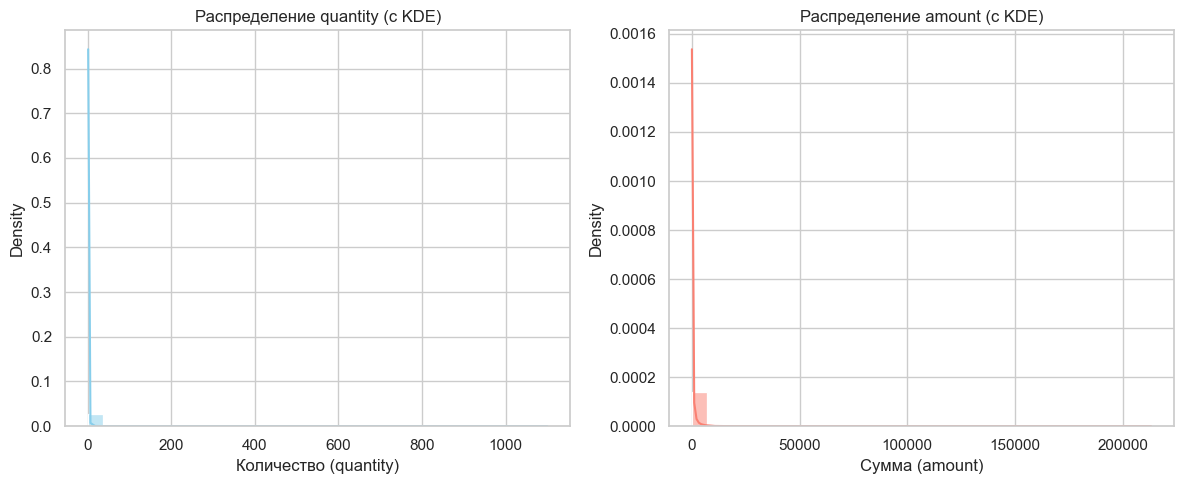

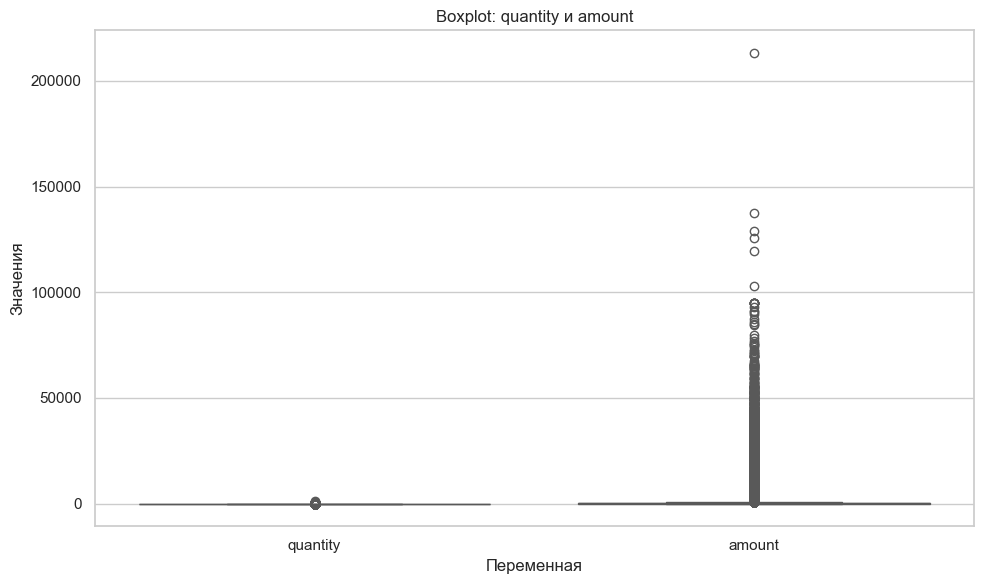

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Убедимся, что используем стили seaborn
sns.set(style="whitegrid")

plt.figure(figsize=(12, 5))

# Левый график: quantity
plt.subplot(1, 2, 1)
sns.histplot(df['quantity'], kde=True, bins=30, color='skyblue', stat='density')
plt.title('Распределение quantity (с KDE)')
plt.xlabel('Количество (quantity)')

# Правый график: amount
plt.subplot(1, 2, 2)
sns.histplot(df['amount'], kde=True, bins=30, color='salmon', stat='density')
plt.title('Распределение amount (с KDE)')
plt.xlabel('Сумма (amount)')

plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 6))

# Переводим данные в "длинный" формат
data_to_plot = df[['quantity', 'amount']].melt(var_name='Переменная', value_name='Значение')

# Исправление: используем `hue`, а не только `palette`
sns.boxplot(
    data=data_to_plot,
    x='Переменная',
    y='Значение',
    hue='Переменная',
    palette='Set2',
    legend=False  # чтобы не было легенды (она бессмысленна при одном значении на группу)
)

plt.title('Boxplot: quantity и amount')
plt.ylabel('Значения')
plt.xlabel('Переменная')

plt.tight_layout()
plt.show()


In [7]:

top_5_products = (df.groupby('item')
                   .agg({'quantity': 'sum', 'amount': 'sum'})
                   .rename(columns={'quantity': 'total_quantity', 'amount': 'total_amount'})
                   .sort_values(by='total_amount', ascending=False)
                   .head(5))


print("ТОП-5 товаров по сумме продаж:")
print(top_5_products)


ТОП-5 товаров по сумме продаж:
          total_quantity  total_amount
item                                  
sku26161           18902       5373638
sku18199            7250       3951361
sku21947           15304       3918570
sku28128            7705       3027786
sku8342             3512       2113158


In [8]:
import pandas as pd
def get_top_products(df, n=5):
    """
    Возвращает ТОП-N товаров по сумме продаж.
    
    Параметры:
    df (pd.DataFrame): DataFrame с колонками 'item', 'quantity', 'amount'
    n (int): Количество топовых товаров для возврата (по умолчанию 5)
    
    Возвращает:
    pd.DataFrame: ТОП-N товаров с агрегированными total_quantity и total_amount
    """

    required_cols = ['item', 'quantity', 'amount']
    if not all(col in df.columns for col in required_cols):
        raise ValueError(f"DataFrame должен содержать колонки: {required_cols}")
    

    top_n = (df.groupby('item')
              .agg({'quantity': 'sum', 'amount': 'sum'})
              .rename(columns={'quantity': 'total_quantity', 'amount': 'total_amount'})
              .sort_values(by='total_amount', ascending=False)
              .head(n))
    
    return top_n


try:
    df = pd.read_csv('transaction.csv')
    df['Date'] = pd.to_datetime(df['trDte'], dayfirst=True)  # преобразуем дату
except FileNotFoundError:
    print("❌ Файл 'transaction.csv' не найден. Проверьте путь.")

    exit()


print("ТОП-5 товаров по сумме продаж:")
top_5 = get_top_products(df, n=5)
print(top_5)
print()


print("ТОП-3 товара:")
top_3 = get_top_products(df, n=3)
print(top_3)
print()


print("ТОП-10 товаров:")
top_10 = get_top_products(df, n=10)
print(top_10)


ТОП-5 товаров по сумме продаж:
          total_quantity  total_amount
item                                  
sku26161           18902       5373638
sku18199            7250       3951361
sku21947           15304       3918570
sku28128            7705       3027786
sku8342             3512       2113158

ТОП-3 товара:
          total_quantity  total_amount
item                                  
sku26161           18902       5373638
sku18199            7250       3951361
sku21947           15304       3918570

ТОП-10 товаров:
          total_quantity  total_amount
item                                  
sku26161           18902       5373638
sku18199            7250       3951361
sku21947           15304       3918570
sku28128            7705       3027786
sku8342             3512       2113158
sku29626           13669       1973964
sku9018             3299       1706341
sku9471             5045       1675843
sku25074            6125       1668585
sku27791            8384       1645042


In [9]:
import pandas as pd

# === ПАРАМЕТРЫ ===
ANALYSIS_END_DATE = '2019-10-31'
ANALYSIS_PERIOD_MONTHS = 6
TOP_N = 5

# === ФУНКЦИЯ: ТОП-N товаров ===
def get_top_products(df: pd.DataFrame, n: int = 5) -> pd.DataFrame:
    """
    Возвращает ТОП-N товаров по сумме продаж.
    """
    required = ['item', 'quantity', 'amount']
    if not all(col in df.columns for col in required):
        raise ValueError(f"Требуются колонки: {required}")
    
    if df.empty:
        return pd.DataFrame(columns=['total_quantity', 'total_amount'])
    
    return (df.groupby('item')
            .agg({'quantity': 'sum', 'amount': 'sum'})
            .rename(columns={'quantity': 'total_quantity', 'amount': 'total_amount'})
            .sort_values('total_amount', ascending=False)
            .head(n))

# === ПРЕОБРАЗОВАНИЕ ДАТ ===
if 'Date' not in df.columns:
    df = df.copy()
    df['Date'] = pd.to_datetime(df['trDte'], dayfirst=True)

# === ФИЛЬТРАЦИЯ ПО ДАТЕ ===
end_date = pd.to_datetime(ANALYSIS_END_DATE)
start_date = end_date - pd.DateOffset(months=ANALYSIS_PERIOD_MONTHS)

mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
recent_data = df.loc[mask].copy()

print(f"Анализ за период с {start_date.date()} по {end_date.date()}")
print(f"Найдено {len(recent_data)} транзакций.\n")

# === ЗАПУСК АНАЛИЗА ===
top_products = get_top_products(recent_data, n=TOP_N)
print(f"ТОП-{TOP_N} товаров по сумме продаж:")
print(top_products)


Анализ за период с 2019-04-30 по 2019-10-31
Найдено 350864 транзакций.

ТОП-5 товаров по сумме продаж:
          total_quantity  total_amount
item                                  
sku26161            7993       2379453
sku18199            3066       1848072
sku21947            5831       1543669
sku8342             1509        970053
sku22208              89        896275


In [10]:
import pandas as pd

# --- Загрузка и предварительная обработка ---
df = pd.read_csv('transaction.csv', sep=None, engine='python')
df.columns = df.columns.str.strip()  # убираем лишние пробелы в названиях колонок

# Преобразуем дату trDte в datetime (с форматом день.месяц.год)
df['trDte'] = pd.to_datetime(df['trDte'], dayfirst=True)

# --- 1. Группировка по clientID ---
# --- 2. Расчёт метрик ---
client_stats = (df.groupby('clientID')
                .agg({
                    'quantity': 'sum',           # общее количество купленных товаров
                    'amount': 'sum',             # общая сумма закупок
                    'trDte': 'nunique'           # количество уникальных дат визитов
                })
                .rename(columns={
                    'quantity': 'total_quantity',
                    'amount': 'total_amount',
                    'trDte': 'visit_days'
                })
                .sort_values(by='total_amount', ascending=False))

# --- 4. Вывод статистики по столбцам ---
print("📊 Статистика по клиентам (по агрегированным метрикам):")
print("-" * 70)

# Для total_quantity (количество товаров)
print(f"{'Кол-во товаров (total_quantity)':<30} | "
      f"min: {client_stats['total_quantity'].min():<6} | "
      f"max: {client_stats['total_quantity'].max():<6} | "
      f"mean: {client_stats['total_quantity'].mean():>8.1f} | "
      f"median: {client_stats['total_quantity'].median():<6}")

# Для total_amount (сумма закупок)
print(f"{'Сумма закупок (total_amount)':<30} | "
      f"min: {client_stats['total_amount'].min():<6} | "
      f"max: {client_stats['total_amount'].max():<6} | "
      f"mean: {client_stats['total_amount'].mean():>8.1f} | "
      f"median: {client_stats['total_amount'].median():<6}")

# Для visit_days (дни визитов)
print(f"{'Дни визитов (visit_days)':<30} | "
      f"min: {client_stats['visit_days'].min():<6} | "
      f"max: {client_stats['visit_days'].max():<6} | "
      f"mean: {client_stats['visit_days'].mean():>8.1f} | "
      f"median: {client_stats['visit_days'].median():<6}")

# Выводим ТОП-10 клиентов по сумме закупок
print("🔝 ТОП-10 клиентов по сумме закупок:")
print(client_stats[['total_amount', 'total_quantity', 'visit_days']].head(10))



📊 Статистика по клиентам (по агрегированным метрикам):
----------------------------------------------------------------------
Кол-во товаров (total_quantity) | min: 1      | max: 5457   | mean:     52.4 | median: 21.0  
Сумма закупок (total_amount)   | min: 10     | max: 3887309 | mean:  14705.7 | median: 6410.0
Дни визитов (visit_days)       | min: 1      | max: 174    | mean:      6.2 | median: 3.0   
🔝 ТОП-10 клиентов по сумме закупок:
             total_amount  total_quantity  visit_days
clientID                                             
client29182       3887309            3434         107
client15654       1443255            5457         174
client8778         986618            1617          17
client1704         636101            1187          23
client33032        537397            1255          74
client37582        502515            2526         159
client20512        431752            1271          70
client6049         431041            1963          87
client30096      

In [11]:
# 1. Фильтрация клиентов: quantity >= 2000 ИЛИ amount >= 500000
filtered_clients = client_stats[
    (client_stats['total_quantity'] >= 2000) | 
    (client_stats['total_amount'] >= 500000)
]

# 2. Вывод количества и списка
print(f"✅ Найдено клиентов, удовлетворяющих условиям: {len(filtered_clients)}")

# 3. Показываем список с основными характеристиками
print("\n📋 Клиенты с высоким объёмом закупок или количеством товаров:")
print(filtered_clients.sort_values(by='total_amount', ascending=False))

# 4. Опционально: сохраняем ID этих клиентов в список
extreme_clients = filtered_clients.index.tolist()  # index — это clientID

print(f"\n📌 ID этих клиентов (для дальнейшего анализа):")
print(extreme_clients)


✅ Найдено клиентов, удовлетворяющих условиям: 9

📋 Клиенты с высоким объёмом закупок или количеством товаров:
             total_quantity  total_amount  visit_days
clientID                                             
client29182            3434       3887309         107
client15654            5457       1443255         174
client8778             1617        986618          17
client1704             1187        636101          23
client33032            1255        537397          74
client37582            2526        502515         159
client30977            2234        407138         121
client34081            2470        386355         157
client20310            3265        366035         102

📌 ID этих клиентов (для дальнейшего анализа):
['client29182', 'client15654', 'client8778', 'client1704', 'client33032', 'client37582', 'client30977', 'client34081', 'client20310']


📊 Анализ одноразовых клиентов (только 1 визит):
------------------------------------------------------------
Общее количество клиентов:          42,746
Одноразовые клиенты (1 визит):      12,859
Доля одноразовых клиентов:          30.08 %
------------------------------------------------------------
Средний чек (средняя сумма):     3,535.45
Среднее количество товаров:          8.67


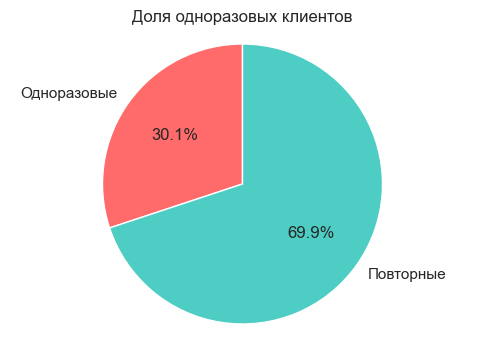

In [12]:

import pandas as pd
import matplotlib.pyplot as plt

def analyze_one_visit_clients(client_stats, visit_col='visit_days', revenue_col='total_amount', quantity_col='total_quantity'):
    """Анализ клиентов с одним визитом."""
    if client_stats.empty:
        print("❌ client_stats пуст — анализ невозможен")
        return None
    
    one_visit = client_stats[client_stats[visit_col] == 1]
    total = len(client_stats)
    n_one = len(one_visit)
    share = (n_one / total) * 100
    avg_revenue = one_visit[revenue_col].mean()
    avg_items = one_visit[quantity_col].mean()
    
    return {
        'total_clients': total,
        'one_visit_count': n_one,
        'one_visit_share': share,
        'avg_revenue': avg_revenue,
        'avg_items': avg_items
    }

# --- Запуск анализа ---
result = analyze_one_visit_clients(client_stats)

if result is not None:
    print("📊 Анализ одноразовых клиентов (только 1 визит):")
    print("-" * 60)
    print(f"Общее количество клиентов:        {result['total_clients']:>8,}")
    print(f"Одноразовые клиенты (1 визит):    {result['one_visit_count']:>8,}")
    print(f"Доля одноразовых клиентов:        {result['one_visit_share']:>7.2f} %")
    print("-" * 60)
    print(f"Средний чек (средняя сумма):     {result['avg_revenue']:>8,.2f}")
    print(f"Среднее количество товаров:      {result['avg_items']:>8.2f}")

    # --- Визуализация ---
    plt.figure(figsize=(6, 4))
    labels = ['Одноразовые', 'Повторные']
    sizes = [result['one_visit_count'], result['total_clients'] - result['one_visit_count']]
    colors = ['#FF6B6B', '#4ECDC4']
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
    plt.title("Доля одноразовых клиентов")
    plt.axis('equal')
    plt.show()


In [13]:
# Проверяем строки с quantity = 0
zero_quantity_rows = df[df['quantity'] == 0]

if len(zero_quantity_rows) > 0:
    print(f"⚠️ Найдено {len(zero_quantity_rows)} строк с quantity = 0. Пример:")
    print(zero_quantity_rows[['trDte', 'bcode', 'clientID', 'item', 'itemGroup', 'quantity', 'amount']])
    
    # Удаляем такие строки
    df = df[df['quantity'] != 0].copy()
    print(f"✅ Строки с quantity = 0 удалены. Осталось строк: {len(df)}")
else:
    print("✅ Нет строк с quantity = 0 — можно продолжать.")

# Теперь безопасно рассчитываем цену
df['price'] = df['amount'] / df['quantity']

# Статистика по price
print("\n📊 Статистика по цене за единицу товара (price):")
print(f"  Минимальная цена:  {df['price'].min():10.2f}")
print(f"  Максимальная цена: {df['price'].max():10.2f}")
print(f"  Средняя цена:       {df['price'].mean():10.2f}")
print(f"  Медианная цена:     {df['price'].median():10.2f}")

# Первые 10 строк с новым столбцом
print("\n📋 Первые 10 строк с рассчитанной ценой:")
columns_to_show = ['trDte', 'bcode', 'clientID', 'item', 'itemGroup', 'quantity', 'amount', 'price']

⚠️ Найдено 1 строк с quantity = 0. Пример:
            trDte          bcode     clientID      item         itemGroup  \
920771 2019-09-14  code000261741  client24307  sku26360  Скобяные изделия   

        quantity  amount  
920771         0       1  
✅ Строки с quantity = 0 удалены. Осталось строк: 1008687

📊 Статистика по цене за единицу товара (price):
  Минимальная цена:        0.00
  Максимальная цена:  119500.00
  Средняя цена:           389.78
  Медианная цена:         102.89

📋 Первые 10 строк с рассчитанной ценой:


In [14]:
# 1. Группировка по товару и расчёт суммы продаж
abc = df.groupby('item').agg({'amount': 'sum'}).rename(columns={'amount': 'total_sales'})

# 2. Сортировка по убыванию
abc = abc.sort_values(by='total_sales', ascending=False)

# 3. Накопительный процент
total_sum = abc['total_sales'].sum()
abc['cumulative_sum'] = abc['total_sales'].cumsum()
abc['cumulative_percent'] = (abc['cumulative_sum'] / total_sum) * 100

# 4. Классификация по группам A, B, C
def assign_group(percent):
    if percent <= 80:
        return 'A'
    elif percent <= 95:
        return 'B'
    else:
        return 'C'

abc['group'] = abc['cumulative_percent'].apply(assign_group)

# 5. Вывод количества и примеров
print("📊 РЕЗУЛЬТАТЫ АВС-АНАЛИЗА (по сумме продаж):")
print(f"Всего уникальных товаров: {len(abc)}")
print("-" * 60)

for group_name in ['A', 'B', 'C']:
    group_data = abc[abc['group'] == group_name]
    count = len(group_data)
    
    desc_map = {
        'A': 'высокая значимость (до 80%)',
        'B': 'средняя значимость (80–95%)',
        'C': 'низкая значимость (>95%)'
    }
    
    print(f"🔹 ГРУППА {group_name} — {desc_map[group_name]}")
    print(f"   → Количество: {count} товар(ов)")
    
    if count > 0:
        print(f"   → Примеры товаров (ТОП-{min(5, count)}):")
        sample = group_data.head(5)
        for item_id, row in sample.iterrows():
            sales = row['total_sales']
            print(f"     • {item_id} — {sales:,.0f}")
    else:
        print(f"   → Примеры: нет данных")
    
    print()  # пустая строка



📊 РЕЗУЛЬТАТЫ АВС-АНАЛИЗА (по сумме продаж):
Всего уникальных товаров: 30566
------------------------------------------------------------
🔹 ГРУППА A — высокая значимость (до 80%)
   → Количество: 5353 товар(ов)
   → Примеры товаров (ТОП-5):
     • sku26161 — 5,373,638
     • sku18199 — 3,951,361
     • sku21947 — 3,918,570
     • sku28128 — 3,027,786
     • sku8342 — 2,113,158

🔹 ГРУППА B — средняя значимость (80–95%)
   → Количество: 8234 товар(ов)
   → Примеры товаров (ТОП-5):
     • sku10822 — 22,836
     • sku10724 — 22,834
     • sku29015 — 22,826
     • sku26094 — 22,824
     • sku19581 — 22,817

🔹 ГРУППА C — низкая значимость (>95%)
   → Количество: 16979 товар(ов)
   → Примеры товаров (ТОП-5):
     • sku18189 — 5,357
     • sku13438 — 5,357
     • sku872 — 5,357
     • sku8935 — 5,355
     • sku5421 — 5,355



📊 ABC-группы по выручке:
          total_sales  cum_percent abc_group
item                                        
sku26161      5373638     0.854847         A
sku18199      3951361     1.483435         A
sku21947      3918570     2.106808         A
📊 XYZ-группы по стабильности:
         mean         cv xyz_group
item                              
sku1    1.375  37.672727         Z
sku10   2.000  61.250000         Z
sku100  1.397  63.206872         Z
🔍 Проверка объединения:
         abc_group xyz_group
item                        
sku26161         A         Z
sku18199         A         Z
sku21947         A         Z
sku28128         A         Z
sku8342          A         Z

📊 Матрица ABC × XYZ:
xyz_group      X     Y      Z  Total
abc_group                           
A           1527   297   3529   5353
B           2562   411   5261   8234
C           7566   645   8768  16979
Total      11655  1353  17558  30566


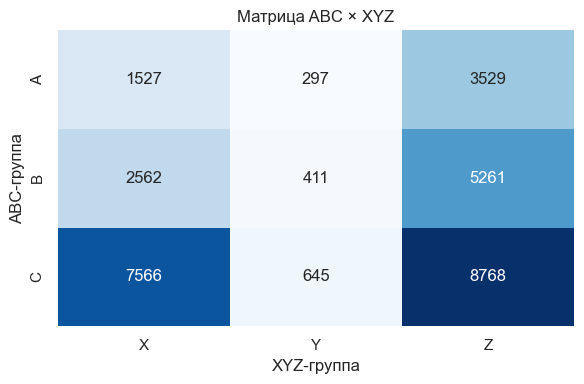

In [15]:
import pandas as pd

if 'df' not in globals():
    df = pd.read_csv('transaction.csv')
    df.columns = df.columns.str.strip()
    df['trDte'] = pd.to_datetime(df['trDte'], dayfirst=True)
    print(f"✅ Загружено {len(df)} транзакций")
# Группируем по товару
abc = df.groupby('item')['amount'].sum().sort_values(ascending=False).to_frame()
abc = abc.rename(columns={'amount': 'total_sales'})

# Накопительный процент
total = abc['total_sales'].sum()
abc['cumsum_amount'] = abc['total_sales'].cumsum()
abc['cum_percent'] = (abc['cumsum_amount'] / total) * 100

# Присваиваем группу A/B/C
def assign_abc(p):
    if p <= 80:
        return 'A'
    elif p <= 95:
        return 'B'
    else:
        return 'C'

abc['abc_group'] = abc['cum_percent'].apply(assign_abc)

print("📊 ABC-группы по выручке:")
print(abc[['total_sales', 'cum_percent', 'abc_group']].head(3))
import numpy as np

# Группируем по товару: mean и std по quantity
xyz = df.groupby('item')['quantity'].agg(['mean', 'std']).round(3)

# Заполняем NaN (если у товара одна продажа)
xyz['std'] = xyz['std'].fillna(0)

# Коэффициент вариации
xyz['cv'] = np.where(xyz['mean'] > 0, (xyz['std'] / xyz['mean']) * 100, 0)

# Присваиваем XYZ-группу
xyz['xyz_group'] = pd.cut(xyz['cv'], bins=[-1, 15, 25, float('inf')], labels=['X', 'Y', 'Z'])

print("📊 XYZ-группы по стабильности:")
print(xyz[['mean', 'cv', 'xyz_group']].head(3))
abc_xyz = abc[['abc_group']].join(xyz[['xyz_group']], how='inner')

# Проверка: всё ли ок?
print("🔍 Проверка объединения:")
print(abc_xyz.head())

# Создаём сводную таблицу
pivot_table = pd.crosstab(
    abc_xyz['abc_group'],
    abc_xyz['xyz_group'],
    margins=True,
    margins_name='Total'
)

print("\n📊 Матрица ABC × XYZ:")
print(pivot_table)
import seaborn as sns
import matplotlib.pyplot as plt

# Убираем итоги для графика
pivot_no_total = pivot_table.loc['A':'C', 'X':'Z']

plt.figure(figsize=(6, 4))
sns.heatmap(pivot_no_total, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Матрица ABC × XYZ")
plt.ylabel("ABC-группа")
plt.xlabel("XYZ-группа")
plt.tight_layout()
plt.show()


In [16]:
import pandas as pd
import numpy as np

def abc_xyz_analysis(df: pd.DataFrame, abc_a: float = 80, abc_b: float = 95) -> pd.DataFrame:
    """
    ABC-XYZ анализ: классификация товаров по выручке и стабильности.
    """
    if df.empty:
        raise ValueError("Пустой DataFrame")
    if not {'item', 'amount', 'quantity', 'trDte'}.issubset(df.columns):
        raise KeyError("Требуются колонки: item, amount, quantity, trDte")
    
    df = df.copy()
    
    # Преобразуем дату, если нужно
    if not pd.api.types.is_datetime64_any_dtype(df['trDte']):
        df['trDte'] = pd.to_datetime(df['trDte'], dayfirst=True)
    
    # ABC по amount
    sales = df.groupby('item')['amount'].sum().sort_values(ascending=False)
    cum_percent = sales.cumsum() / sales.sum() * 100
    abc_group = pd.cut(cum_percent, bins=[0, abc_a, abc_b, 100], labels=['A', 'B', 'C'])
    
    # XYZ по quantity
    qty_stats = df.groupby('item')['quantity'].agg(['mean', 'std']).fillna(0)
    cv = (qty_stats['std'] / qty_stats['mean']).replace([np.inf, -np.inf], 0) * 100
    xyz_group = pd.cut(cv, bins=[0, 15, 25, float('inf')], labels=['X', 'Y', 'Z'])
    
    return pd.DataFrame({'abc': abc_group, 'xyz': xyz_group})

# --- Основной анализ ---
df['trDte'] = pd.to_datetime(df['trDte'], dayfirst=True)
last_6m = df[df['trDte'].between('2019-05-01', '2019-10-31')]

full_results = abc_xyz_analysis(df).add_suffix('_full')
recent_results = abc_xyz_analysis(last_6m).add_suffix('_recent')

# --- Сравнение ---
comparison = full_results.join(recent_results, on='item', how='inner')

# --- Динамика ABC ---
priority = {'A': 1, 'B': 2, 'C': 3}
comparison['full_rank'] = comparison['abc_full'].map(priority)
comparison['recent_rank'] = comparison['abc_recent'].map(priority)
comparison['improved'] = comparison['full_rank'] > comparison['recent_rank']
comparison['worsened'] = comparison['full_rank'] < comparison['recent_rank']

# --- Вывод ---
total = len(comparison)
improved = comparison['improved'].sum()
worsened = comparison['worsened'].sum()

print(f"📊 Всего товаров: {total}")
print(f"🚀 Улучшили позиции: {improved} ({improved/total:.1%})")
print(f"🔻 Ухудшили позиции: {worsened} ({worsened/total:.1%})")
print(f"➡️  Без изменений: {total - improved - worsened}")

print("\n🚀 Улучшившиеся:")
print(comparison[comparison['improved']][['abc_full', 'abc_recent']].head())

print("\n🔻 Ухудшившиеся:")
print(comparison[comparison['worsened']][['abc_full', 'abc_recent']].head())



📊 Всего товаров: 21767
🚀 Улучшили позиции: 1346 (6.2%)
🔻 Ухудшили позиции: 2956 (13.6%)
➡️  Без изменений: 17465

🚀 Улучшившиеся:
         abc_full abc_recent
item                        
sku10013        B          A
sku10016        C          B
sku10029        B          A
sku10047        C          B
sku10096        C          B

🔻 Ухудшившиеся:
         abc_full abc_recent
item                        
sku10000        B          C
sku10015        B          C
sku10020        B          C
sku10027        B          C
sku10033        B          C


In [ ]:
print("🔄 Создаём client_stats из исходного df...")

client_stats = (df.groupby('clientID')
                .agg({
                    'quantity': 'sum',           # общее количество купленных товаров
                    'amount': 'sum',             # общая сумма покупок
                    'trDte': 'nunique'           # количество уникальных дат визитов
                })
                .rename(columns={
                    'quantity': 'total_quantity',
                    'amount': 'total_amount',
                    'trDte': 'visit_days'
                })
                .sort_values(by='total_amount', ascending=False)
                .reset_index())

print(f"✅ client_stats успешно создан: {len(client_stats)} клиентов")
print("📌 Первые 5 строк:")
print(client_stats.head(5))


 


In [18]:
files_to_save = []

# --- 1. ТОП-5 товаров ---
top_5_products = (df.groupby('item')
                  .agg({'amount': 'sum'})
                  .rename(columns={'amount': 'total_amount'})
                  .sort_values(by='total_amount', ascending=False)
                  .head(5)
                  .reset_index())
top_5_products.to_csv('top_5_products.csv', index=False)
files_to_save.append('top_5_products.csv')

# --- 2. Статистика по клиентам ---
# Теперь client_stats точно существует
client_stats.to_csv('client_statistics.csv', index=False)
files_to_save.append('client_statistics.csv')

# ... остальные блоки (ABC, XYZ и т.д.) — как у вас

In [19]:
if 'abc' not in globals():
    print("🔧 Создаём ABC-анализ...")
    abc = df.groupby('item')['amount'].sum().sort_values(ascending=False).to_frame()
    abc['cum_percent'] = abc['amount'].cumsum() / abc['amount'].sum() * 100
    abc['abc_group'] = pd.cut(abc['cum_percent'], bins=[0, 80, 95, 100], labels=['A', 'B', 'C'])
    abc = abc.rename(columns={'amount': 'total_sales'})[['total_sales', 'abc_group']]

# Экспорт
abc_export = abc.reset_index()
abc_export.to_csv('abc_analysis.csv', index=False)
files_to_save.append('abc_analysis.csv')
print("✅ АВС-анализ сохранён")



✅ АВС-анализ сохранён


In [20]:
if 'xyz' not in globals():
    print("🔧 Создаём XYZ-анализ...")
    xyz = df.groupby('item')['quantity'].agg(['mean', 'std']).fillna(0)
    xyz['cv'] = (xyz['std'] / xyz['mean']).replace([np.inf, -np.inf], 0) * 100
    xyz['xyz_group'] = pd.cut(xyz['cv'], bins=[0, 15, 25, float('inf')], labels=['X', 'Y', 'Z'])
    xyz = xyz[['mean', 'std', 'cv', 'xyz_group']]

# Экспорт
xyz_export = xyz.reset_index()
xyz_export.to_csv('xyz_analysis.csv', index=False)
files_to_save.append('xyz_analysis.csv')
print("✅ XYZ-анализ сохранён")


✅ XYZ-анализ сохранён


In [21]:
# Объединяем ABC и XYZ по item
abc_xyz_combined = abc[['abc_group']].join(xyz[['xyz_group']], on='item', how='inner')
abc_xyz_export = abc_xyz_combined.reset_index()

abc_xyz_export.to_csv('abc_xyz_matrix.csv', index=False)
files_to_save.append('abc_xyz_matrix.csv')
print("✅ Матрица ABC-XYZ сохранена")


✅ Матрица ABC-XYZ сохранена


In [22]:
if 'last_6m' not in globals():
    print("🔧 Фильтруем данные за последние 6 месяцев...")
    df['trDte'] = pd.to_datetime(df['trDte'], dayfirst=True)
    last_6m = df[df['trDte'].between('2019-05-01', '2019-10-31')].copy()

last_6m.to_csv('last_6_months_data.csv', index=False)
files_to_save.append('last_6_months_data.csv')
print("✅ Данные за 6 месяцев сохранены")


✅ Данные за 6 месяцев сохранены


In [27]:
import os
import pandas as pd

print("\n" + "🔍 ПРОВЕРКА СОХРАНЁННЫХ ФАЙЛОВ:" + "\n" + "=" * 60)

for file in files_to_save:
    if os.path.exists(file):
        print(f"\n📄 {file}")
        try:
            data = pd.read_csv(file)
            print(data.head(5).to_string(index=False))
        except Exception as e:
            print(f"❌ Ошибка при чтении: {e}")
    else:
        print(f"❌ Файл не найден: {file}")



🔍 ПРОВЕРКА СОХРАНЁННЫХ ФАЙЛОВ:

📄 top_5_products.csv
    item  total_amount
sku26161       5373638
sku18199       3951361
sku21947       3918570
sku28128       3027786
 sku8342       2113158

📄 client_statistics.csv
 total_quantity  total_amount  visit_days
           3434       3887309         107
           5457       1443255         174
           1617        986618          17
           1187        636101          23
           1255        537397          74

📄 abc_analysis.csv
    item  total_sales  cumsum_amount  cum_percent abc_group
sku26161      5373638        5373638     0.854847         A
sku18199      3951361        9324999     1.483435         A
sku21947      3918570       13243569     2.106808         A
sku28128      3027786       16271355     2.588473         A
 sku8342      2113158       18384513     2.924637         A

📄 xyz_analysis.csv
    item  mean   std         cv xyz_group
    sku1 1.375 0.518  37.672727         Z
   sku10 2.000 1.225  61.250000         Z
  sku

In [28]:
print("📁 Текущая папка:")
print(os.getcwd())

📁 Текущая папка:
d:\code\.venv
